In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from Energy_Models import Models as me
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import keras.layers
import keras.backend as K
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

In [2]:
df=pd.read_csv('energydata_complete.csv' ,index_col="date")

In [3]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [4]:
df2    = df.copy()
scaler = MinMaxScaler().fit(df2)
df2    = pd.DataFrame(scaler.transform(df2))

X = df2.iloc[:,1:]
y = df2.iloc[:,0]

In [5]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test=train_test_split(X ,y ,test_size=0.30,random_state=35)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)
X_train = np.array(X_train)
X_test  = np.array(X_test)

In [6]:
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((13814, 27), (2961, 27), (13814,), (2961,))

In [7]:
X_val = np.array(X_val)

In [8]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test  = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

X_val = X_val.reshape(X_val.shape[0],1,X_val.shape[1])

In [9]:
X_train.shape ,X_test.shape 

((13814, 1, 27), (2961, 1, 27))

In [10]:
X.shape ,y.shape

((19735, 27), (19735,))

In [12]:
def root_mean_squared_error(y_true, y_pred):    
    return np.sqrt(mean_squared_error(y_true, y_pred))
model=me.BiGRU(1,27,1).getModel()
model.compile(optimizer='adam', loss ='mse')
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3,epochs=85, verbose=1, shuffle=False)

Epoch 1/85
38/38 [==============================] - 18s 90ms/step - loss: 0.0102 - val_loss: 0.0096
Epoch 2/85
38/38 [==============================] - 1s 26ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 3/85
38/38 [==============================] - 1s 26ms/step - loss: 0.0088 - val_loss: 0.0087
Epoch 4/85
38/38 [==============================] - 1s 26ms/step - loss: 0.0086 - val_loss: 0.0086
Epoch 5/85
38/38 [==============================] - 1s 27ms/step - loss: 0.0084 - val_loss: 0.0085
Epoch 6/85
38/38 [==============================] - 1s 26ms/step - loss: 0.0083 - val_loss: 0.0084
Epoch 7/85
38/38 [==============================] - 1s 29ms/step - loss: 0.0082 - val_loss: 0.0084
Epoch 8/85
38/38 [==============================] - 1s 26ms/step - loss: 0.0082 - val_loss: 0.0083
Epoch 9/85
38/38 [==============================] - 1s 25ms/step - loss: 0.0081 - val_loss: 0.0083
Epoch 10/85
38/38 [==============================] - 1s 26ms/step - loss: 0.0079 - val_loss: 0.0082
Epoch 11

In [13]:
me.evaluate(model,X_train, y_train)

432/432 [==============================] - 1s 3ms/step - loss: 0.0071
evaluation : 0.007 


In [14]:
me.evaluate(model,X_test, y_test)

93/93 [==============================] - 0s 3ms/step - loss: 0.0065
evaluation : 0.006 


In [15]:
y_pred_test=model.predict(X_test)

93/93 [==============================] - 3s 3ms/step


In [16]:
y_pred_train=model.predict(X_train)

432/432 [==============================] - 1s 3ms/step


In [17]:
me.print_metrics(model,y_train,y_pred_train,y_test,y_pred_test)

Train RMSE value   : 0.084 
Train MSE value    : 0.007 
Train R2 value     : 0.229 
Train MAPE value   : 97078891289.566 
Train RMLSE value  : 0.005 
Train MAE value    : 0.045 
---------------------------------------------
Test RMSE value   : 0.081 
Test MSE value   : 0.006 
Test R2 value   : 0.231 
Test MAPE value  : 0.716 
Test RMLSE value  : 0.004 
Test MAE value : 0.045 


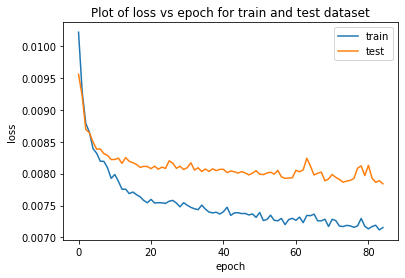

In [18]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()